# Visualize Prediction

## Imports and Functions

In [1]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape

import os
import numpy as np
import sys
import tensorflow as tf
import random
import keras

SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [2]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [3]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    get_info_experiment
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]


## Chile good predictions per season

In [5]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

,id,filename,season,indices
0,978f49d7,predictor_978f49d7_1.parquet,1,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
1,978f49d7,predictor_978f49d7_2.parquet,2,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
2,978f49d7,predictor_978f49d7_3.parquet,3,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
3,978f49d7,predictor_978f49d7_4.parquet,4,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
4,978f49d7,predictor_978f49d7_5.parquet,5,fde0e327-340e2882-43701738-e306f58b-e601b072-e...
...,...,...,...,...
247,458d357c,predictor_458d357c_8.parquet,8,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
248,458d357c,predictor_458d357c_9.parquet,9,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
249,458d357c,predictor_458d357c_10.parquet,10,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...
250,458d357c,predictor_458d357c_11.parquet,11,32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...


### Summer

In [6]:
ids_to_execute = ["891b838a"]
get_info_experiment(ids_to_execute[0], f"data/summer_features/{region}/metadata.csv", "data/my_indices/metadata.csv", "data/extra_indices/metadata.csv")

,filename,method,rolling,variables,boxes,reference_period,target_period
id,,,,,,,
c8260118,index_c8260118.parquet,normdiff,MSL,vaguada|config,NoRef,1971-2022,NaN
1e8ced6f,index_1e8ced6f.parquet,normalized,ADV,268|283|-32|-20,1972-2024,1971-2022,NaN
26976a3c,index_26976a3c.parquet,normalized,ADV,282|286|-42|-33,1972-2024,1971-2022,NaN
e0fba9b4,index_e0fba9b4.parquet,bloqueo,U|MSL,bloqueo|norte|boxes,1980-2010,1971-2022,NaN
7e5d8e97,index_7e5d8e97.parquet,bloqueo,U|MSL,bloqueo|sur|boxes,1980-2010,1971-2022,NaN
73f26a9f,index_73f26a9f.parquet,anom,1,SST,270|280|-10|0,1980-2010,1971-2022
f12683c1,index_f12683c1.parquet,anom,1,SST,190|240|-5|5,1980-2010,1971-2022
f955ff1c,index_f955ff1c.parquet,anom,1,T,286|288|-42|-33,1980-2010,1971-2022
6447140c,index_6447140c.parquet,max,1,MSL,260|284|-44|-17,1980-2010,1971-2022


Executing 891b838a iter 1
2/2 [==============================] - 0s 3ms/step


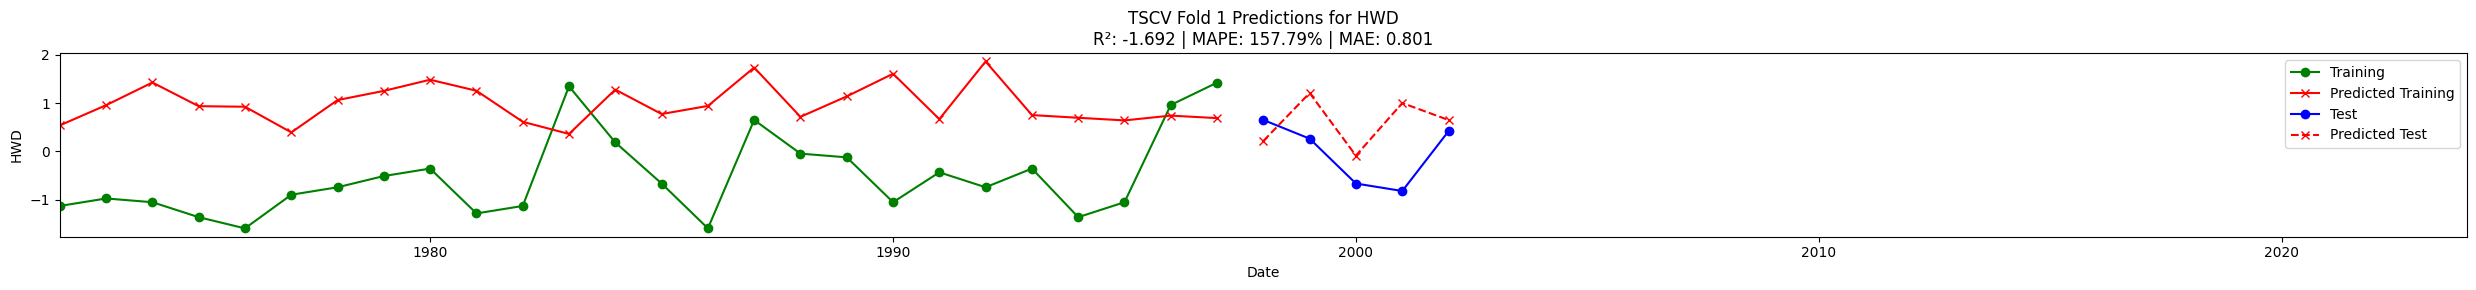

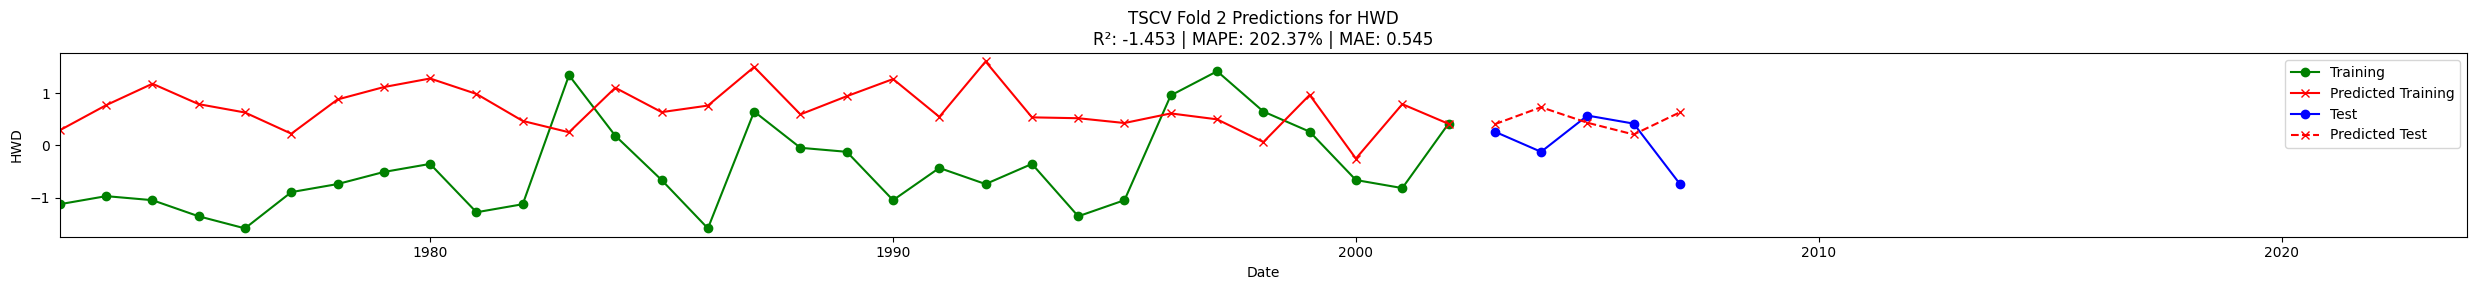

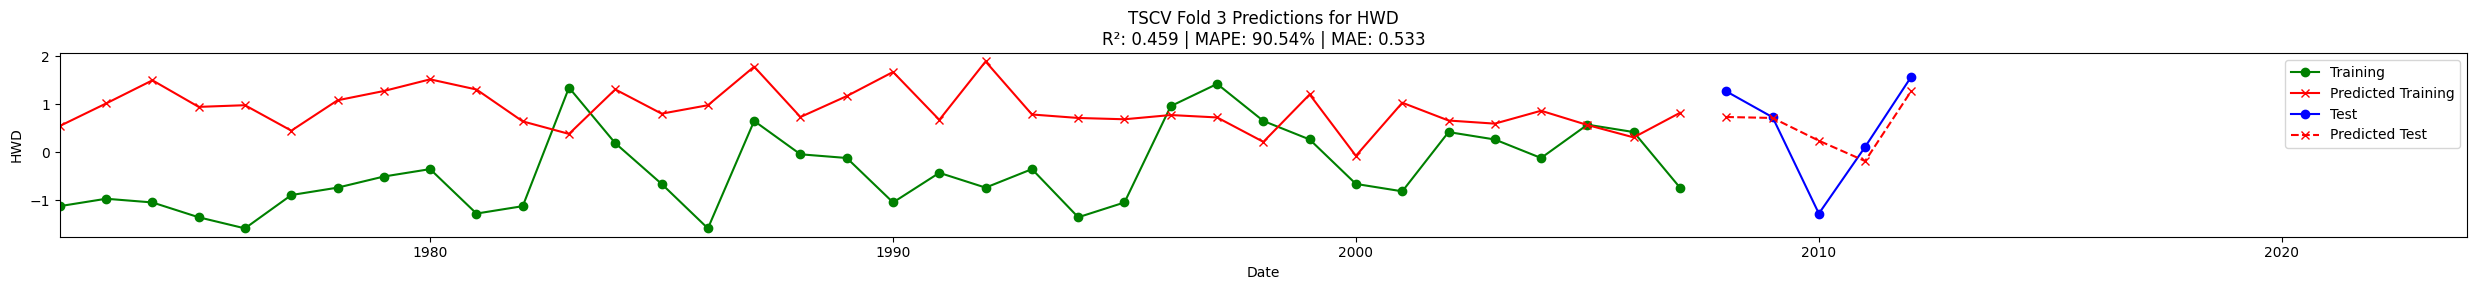

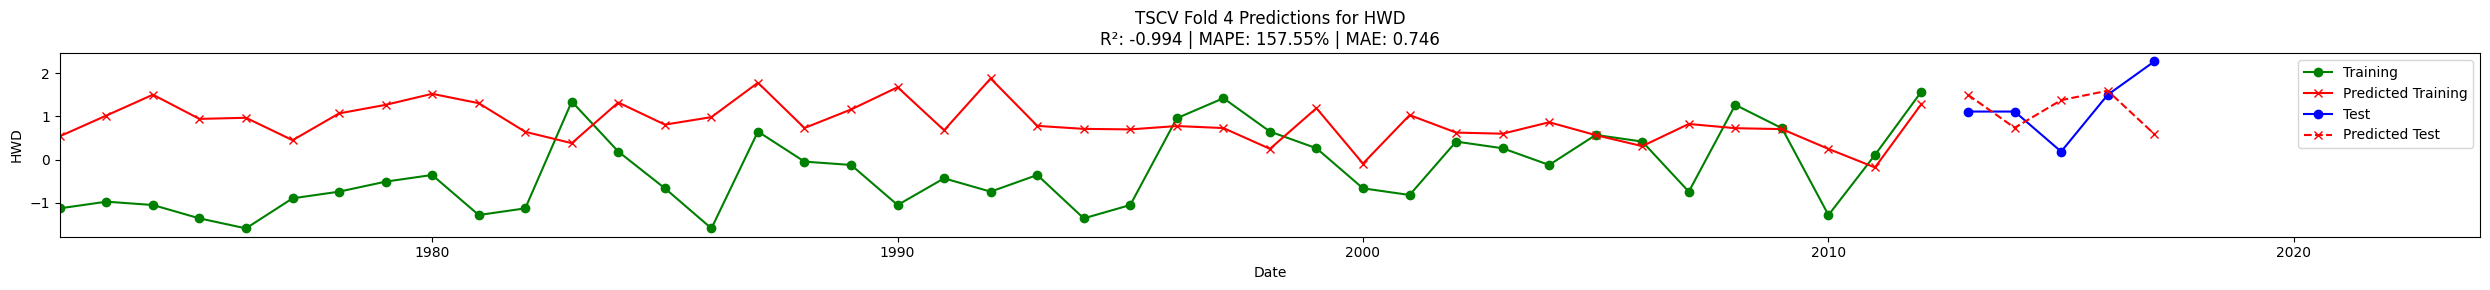

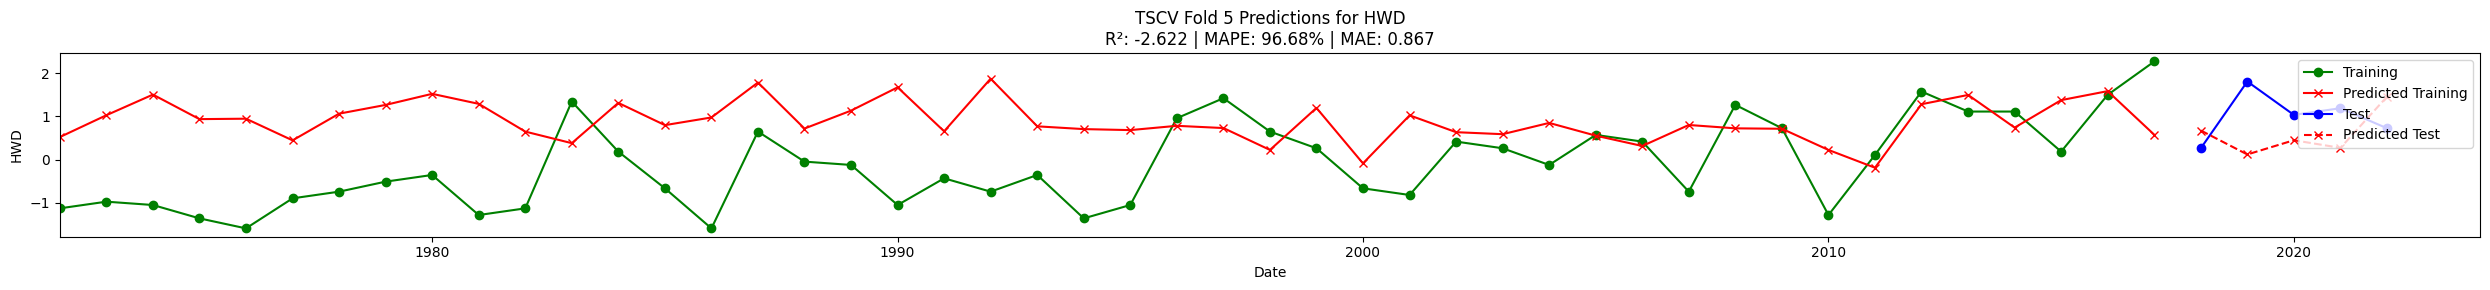

In [7]:
k=0
season = 1
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {season: pd.read_parquet(f"data/summer_features/{region}/predictor_{id}_{season}.parquet")}
    model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[season].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    experiment_1 = PredictionExperiment(data, indices_of_interest, [model], ["CNNRNN16"], 5, id)
    experiment_1.execute_experiment(label_plot="HWD")